In [64]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [65]:
delay_df = pd.read_csv('Toronto-Subway-Delay-Jan-2014-Jun-2021.csv')
code_df = pd.read_csv('Toronto-Subway-Delay-Codes.csv')

In [66]:
weather_data_2019 = pd.concat([pd.read_csv('Weather_Data/2019/'+filen) for filen in os.listdir('Weather_Data/2019')])
weather_data_2019.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 00:00,2019,1,1,00:00,4.3,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 01:00,2019,1,1,01:00,5.1,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 02:00,2019,1,1,02:00,5.9,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 03:00,2019,1,1,03:00,3.3,...,NaN,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 04:00,2019,1,1,04:00,2.8,...,NaN,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
weather_data_2019.index = pd.DatetimeIndex(weather_data_2019['Date/Time'])
weather_data_2019 = weather_data_2019.drop(['Date/Time'], axis=1)
weather_data_2019.index = weather_data_2019.index.tz_localize(tz='EST')

weather_data_2019.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,00:00,4.3,NaN,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2019-01-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,01:00,5.1,NaN,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,02:00,5.9,NaN,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2019-01-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,03:00,3.3,NaN,...,NaN,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,04:00,2.8,NaN,...,NaN,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN


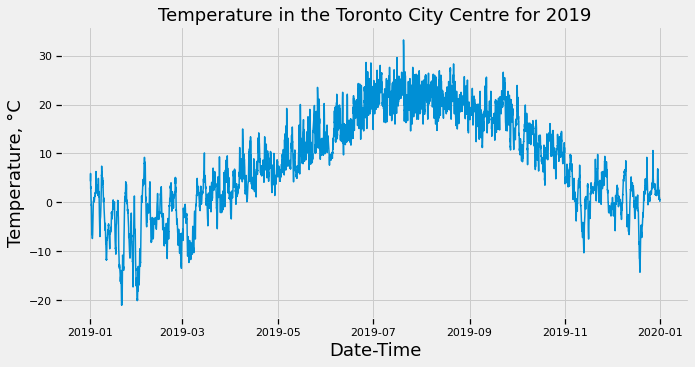

In [68]:
# Write your code here.
plt.figure(figsize=(10, 5))
plt.title('Temperature in the Toronto City Centre for 2019', fontsize=18)
ax = sns.lineplot(data=weather_data_2019, x=weather_data_2019.index, y='Temp (°C)')
ax.set_xlabel('Date-Time', fontsize=18)
ax.set_ylabel('Temperature, °C', fontsize=18)
plt.show()

In [69]:
delay_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014/01/01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386


In [70]:
delay_df.dtypes

Date         object
Time         object
Day          object
Station      object
Code         object
Min Delay     int64
Min Gap       int64
Bound        object
Line         object
Vehicle       int64
dtype: object

In [71]:
#delay_df['dtime'] = pd.to_datetime(delay_df['Date'] + ' ' + delay_df['Time'])

In [72]:
missing_df = delay_df.isnull().sum().to_frame('count')
missing_df

,count
Date,0
Time,0
Day,0
Station,0
Code,1
Min Delay,0
Min Gap,0
Bound,32214
Line,544
Vehicle,0


In [73]:
line = delay_df['Line'].value_counts(normalize=True)
line

YU                        0.463741
BD                        0.451501
SRT                       0.037022
SHP                       0.034114
YU/BD                     0.011920
                            ...   
341 KEELE                 0.000007
63 OSSINGTON              0.000007
129 MCCOWAN NORTH         0.000007
YU BD                     0.000007
YONGE/UNIVERSITY/BLOOR    0.000007
Name: Line, Length: 71, dtype: float64

In [74]:
print("Percentage of Accurate Data:\n" ,line.iloc[0:4].sum()*100)

Percentage of Accurate Data:
 98.63781883618253


In [75]:
line.index[0:4].values.tolist()

['YU', 'BD', 'SRT', 'SHP']

In [76]:
bound = delay_df['Bound'].value_counts()
bound

S    30518
W    28736
E    26793
N    25561
B       90
Y        2
R        1
5        1
0        1
Name: Bound, dtype: int64

In [77]:
bound.index[0:4].values.tolist()

['S', 'W', 'E', 'N']

In [78]:
newdf = delay_df.loc[delay_df['Line'].isin(line.index[0:4].values.tolist()) & delay_df['Bound'].isin(bound.index[0:4].values.tolist())]
newdf

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
5,2014/01/01,03:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174
...,...,...,...,...,...,...,...,...,...,...
143908,2021/06/30,00:11,Wednesday,BAY STATION,PUTDN,0,0,W,BD,5112
143909,2021/06/30,00:42,Wednesday,VAUGHAN MC STATION,MUPAA,0,0,S,YU,5511
143910,2021/06/30,00:45,Wednesday,OSSINGTON STATION,MUIRS,0,0,E,BD,0
143915,2021/06/30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171


In [79]:
newdf['Bound'].value_counts()

S    30492
W    28684
E    26746
N    25542
Name: Bound, dtype: int64

In [80]:
newdf.isnull().sum()

Date         0
Time         0
Day          0
Station      0
Code         1
Min Delay    0
Min Gap      0
Bound        0
Line         0
Vehicle      0
dtype: int64

In [81]:
newdf.shape

(111464, 10)

In [82]:
delay_df.shape

(143917, 10)

In [83]:
newdf.dropna(how='any',inplace=True)

In [84]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111463 entries, 0 to 143916
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       111463 non-null  object
 1   Time       111463 non-null  object
 2   Day        111463 non-null  object
 3   Station    111463 non-null  object
 4   Code       111463 non-null  object
 5   Min Delay  111463 non-null  int64 
 6   Min Gap    111463 non-null  int64 
 7   Bound      111463 non-null  object
 8   Line       111463 non-null  object
 9   Vehicle    111463 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 9.4+ MB


In [85]:
newdf['Min Delay']

0         55
1          3
3          3
4          5
5          0
          ..
143908     0
143909     0
143910     0
143915     9
143916     5
Name: Min Delay, Length: 111463, dtype: int64

In [86]:
df_100delay=newdf.sort_values('Min Delay', ascending=False).head(100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


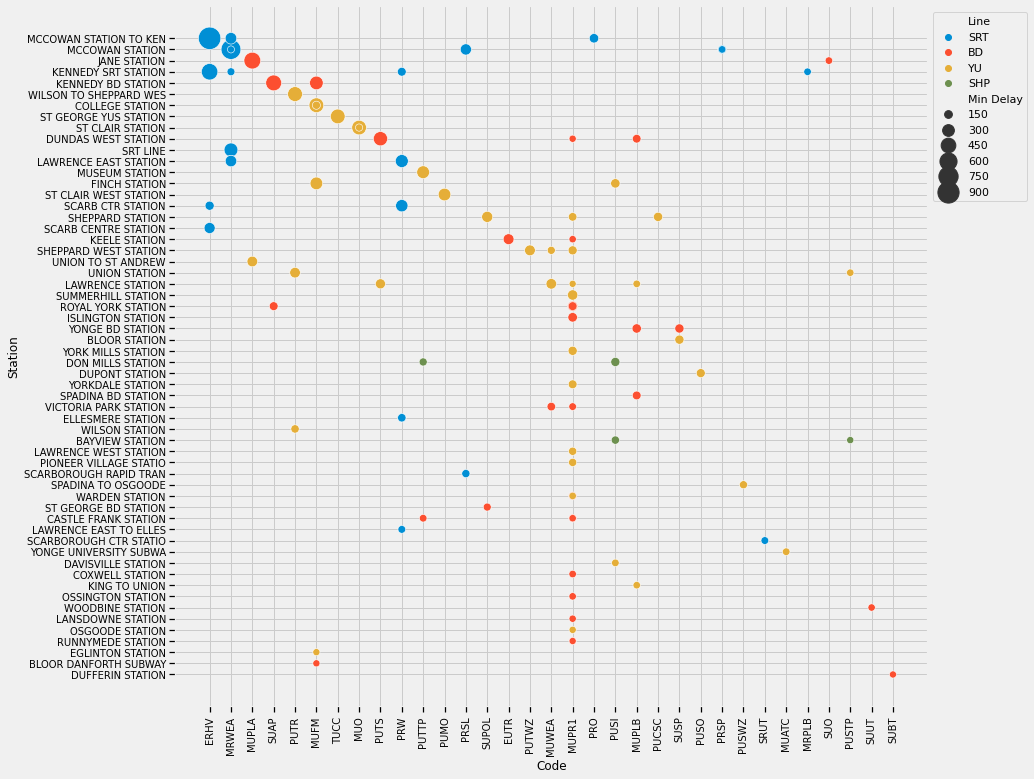

In [87]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_100delay['Code'],y=df_100delay['Station'],hue=df_100delay['Line'],size=df_100delay['Min Delay'],data=df_100delay,sizes=(50,500))
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

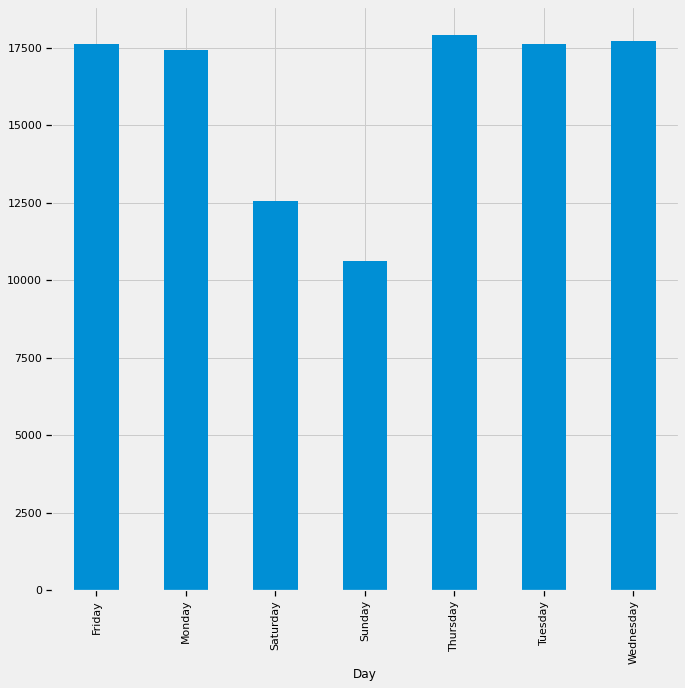

In [88]:
newdf.groupby('Day')['Code'].count().plot.bar(figsize=(10,10))
plt.show()

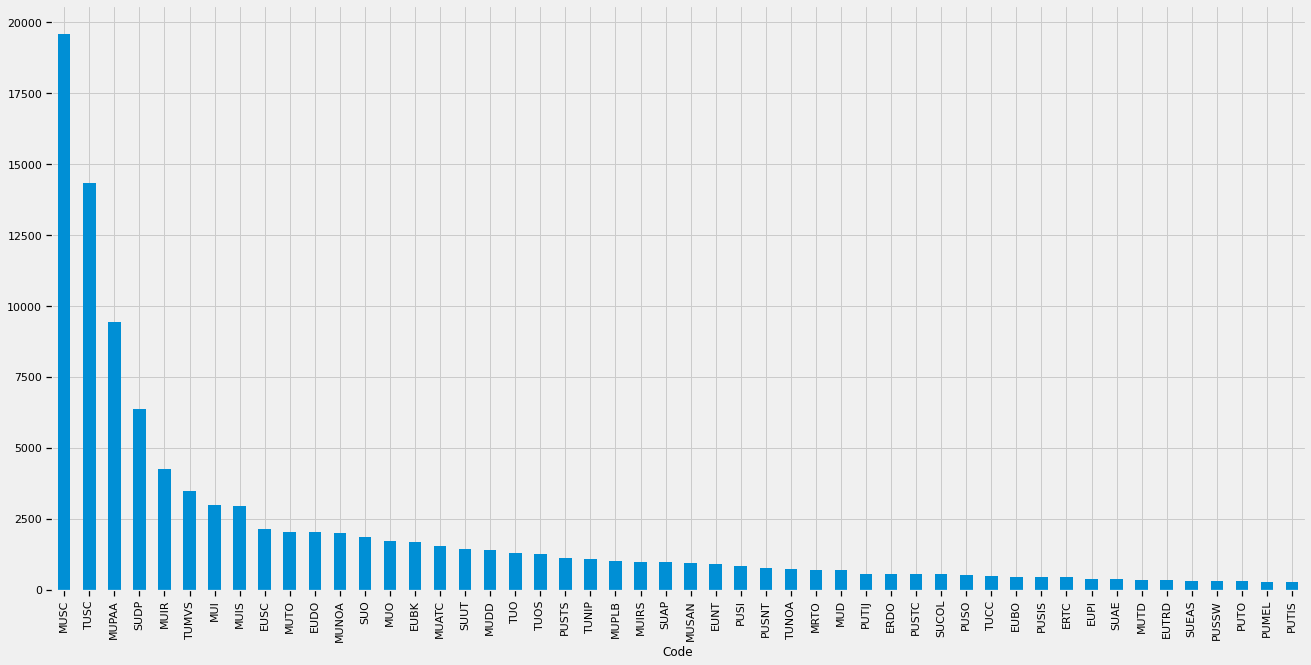

In [89]:
newdf.groupby('Code')['Code'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(20,10))
plt.show()

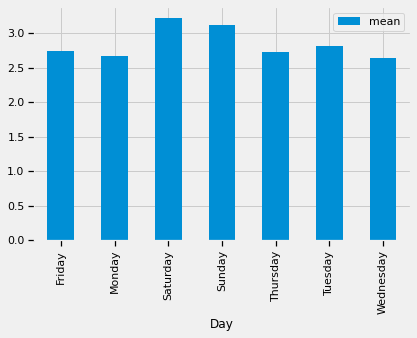

In [90]:
#plt.figure(figsize=(20, 6))
newdf.groupby(newdf['Day'])['Min Delay'].agg(['mean']).plot.bar()
plt.show()

In [91]:
code_df.loc[code_df['RMENU CODE'] == 'MUSC']['CODE DESCRIPTION']

53    Miscellaneous Speed Control
Name: CODE DESCRIPTION, dtype: object

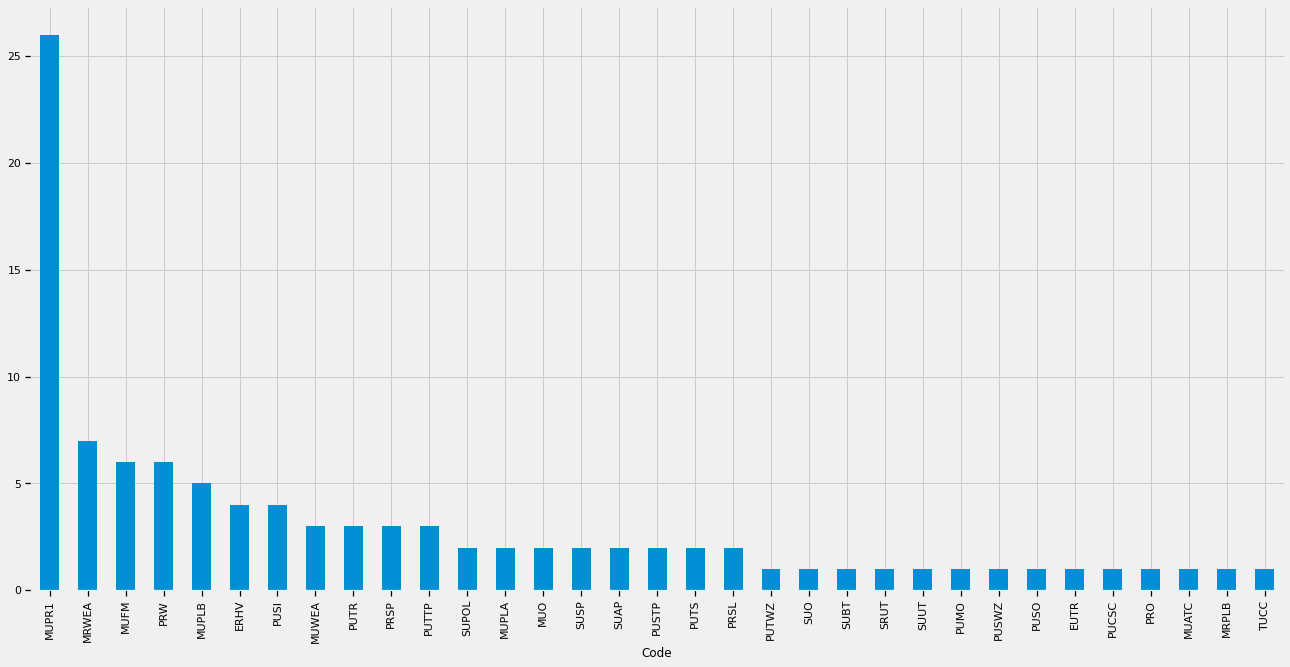

In [92]:
df_100delay.groupby('Code')['Code'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(20,10))
plt.show()

In [93]:
df_100delay.groupby('Code')['Code'].count().sort_values(ascending=False).index[0]

'MUPR1'

In [94]:
code_df.loc[code_df['RMENU CODE'] == 'MUPR1']['CODE DESCRIPTION']

51    Priority One - Train in Contact With Person
Name: CODE DESCRIPTION, dtype: object

In [95]:
code_df.rename(columns = {'RMENU CODE': "Code"}, inplace = True)

In [160]:
big_df = pd.merge(newdf, code_df, how = "left", on = "Code")

In [161]:
big_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Code #,Vehicle Type,CODE DESCRIPTION
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,52.0,SUB,Priority One - Train in Contact With Person
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,105.0,SUB,Disorderly Patron
2,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,105.0,SUB,Disorderly Patron
3,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,53.0,SUB,Unsanitary Vehicle
4,2014/01/01,03:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174,48.0,SUB,Passenger Assistance Alarm Activated - No Trou...


In [162]:
big_df.dropna(how = "any", inplace = True)
big_df.isnull().sum()

Date                0
Time                0
Day                 0
Station             0
Code                0
Min Delay           0
Min Gap             0
Bound               0
Line                0
Vehicle             0
Code #              0
Vehicle Type        0
CODE DESCRIPTION    0
dtype: int64

In [163]:
# set the date column as a datetime object
import datetime
#big_df['Date'] = pd.to_datetime(big_df['Date'])
# create merged Date Time Column 
big_df['Datetime'] = pd.to_datetime(big_df['Date'] + ' ' + big_df['Time'])
# plot subway delays throughout time 
#big_df['Datetime'] = pd.to_datetime(big_df['Datetime'])
# import pytz package 
import pytz
# localize timezone to EST (Toronto Timezone)
# declare eastern time stamp variable to use in for loop 
est = pytz.timezone('Canada/Eastern')

# Apply the EST timezone to all date times in index column 
big_df['Datetime'] = big_df.apply(lambda row: est.localize(row['Datetime']), axis = 1)
# create hour column which will be used in plots later
big_df['Hour'] = big_df['Datetime'].dt.hour
# create month column which will be used in plots later 
big_df['Month'] = big_df['Datetime'].dt.month
# make day column a datetime object
big_df['Day'] = big_df['Datetime'].dt.dayofweek
big_df['Year'] = big_df['Datetime'].dt.year
big_df['Date'] = pd.to_datetime(big_df['Date'])

In [164]:
big_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Code #,Vehicle Type,CODE DESCRIPTION,Datetime,Hour,Month,Year
0,2014-01-01,00:21,2,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,52.0,SUB,Priority One - Train in Contact With Person,2014-01-01 00:21:00-05:00,0,1,2014
1,2014-01-01,02:06,2,HIGH PARK STATION,SUDP,3,7,W,BD,5001,105.0,SUB,Disorderly Patron,2014-01-01 02:06:00-05:00,2,1,2014
2,2014-01-01,03:10,2,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,105.0,SUB,Disorderly Patron,2014-01-01 03:10:00-05:00,3,1,2014
3,2014-01-01,03:20,2,BLOOR STATION,MUSAN,5,10,S,YU,5386,53.0,SUB,Unsanitary Vehicle,2014-01-01 03:20:00-05:00,3,1,2014
4,2014-01-01,03:29,2,DUFFERIN STATION,MUPAA,0,0,E,BD,5174,48.0,SUB,Passenger Assistance Alarm Activated - No Trou...,2014-01-01 03:29:00-05:00,3,1,2014


<AxesSubplot:xlabel='Date'>

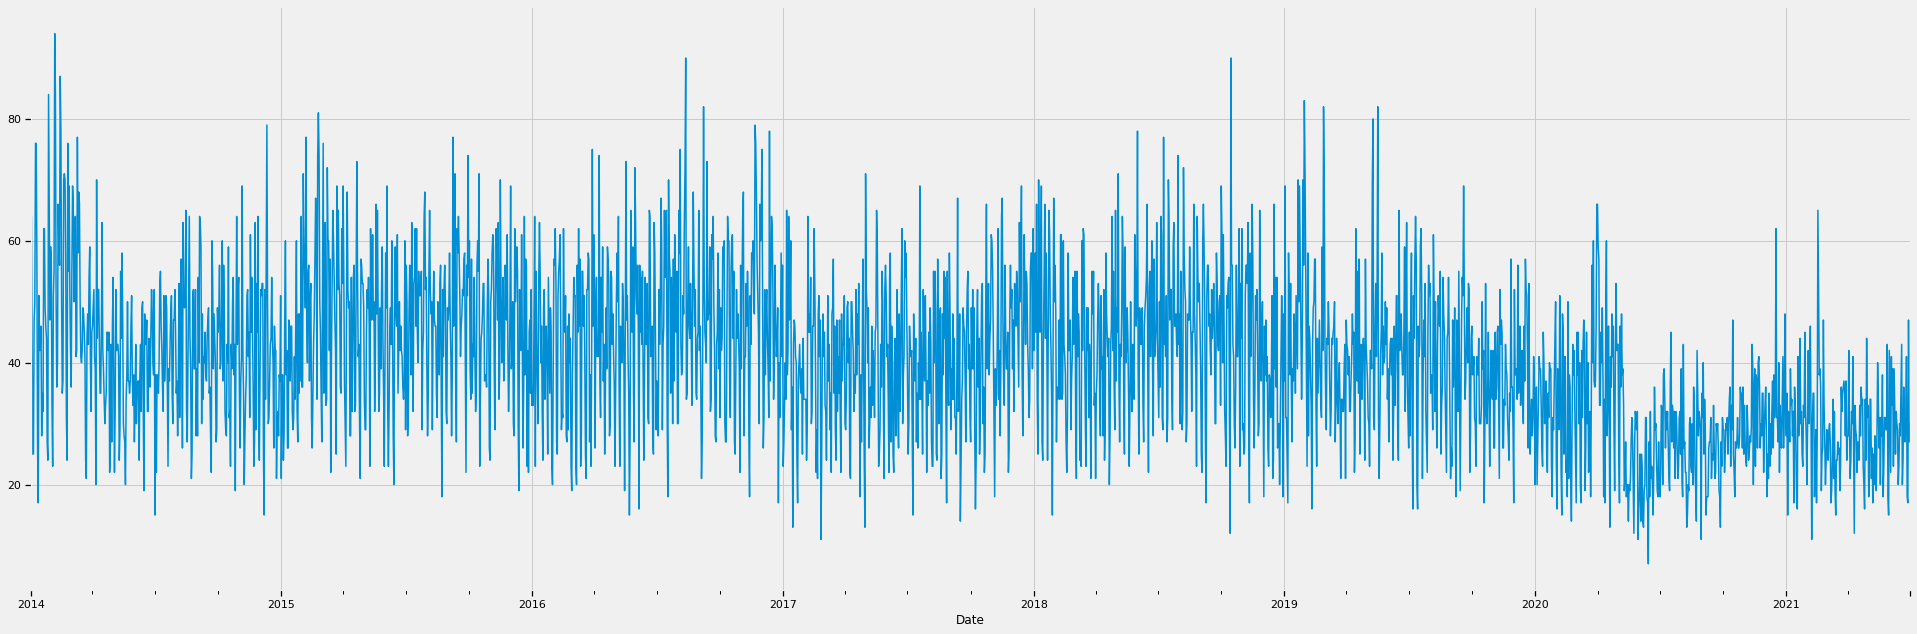

In [165]:
df_ts=big_df.groupby('Date')['Code'].count()
df_ts.plot(figsize=(30,10))

In [244]:
from sklearn.model_selection import train_test_split

# Write your code here.
train, test = train_test_split(big_df, test_size=0.3, random_state=0)
test, val = train_test_split(test, test_size=0.5, random_state=0)
# Print results
print('Train {}%'.format(train.shape[0] / big_df.shape[0] * 100))
print('Val {}%'.format(val.shape[0] / big_df.shape[0] * 100))
print('Test {}%'.format(test.shape[0] / big_df.shape[0] * 100))

Train 69.99937033938707%
Val 15.000314830306467%
Test 15.000314830306467%


In [245]:
def select_columns(data, columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data(data, columns):
    """Process the data for a guided model."""
    
    # Transform Data, Select Features
    data = select_columns(data, columns)
#                           'Min Delay', 
# #                          'Min Gap', 
#                           'Day',
# #                          'Station',
# #                          'Code',
#                           'Hour',
#                           'Month',
# #                          'Line',
# #                          'Year')
    
    # Return predictors and response variables separately
    X = data.drop(['Min Delay'], axis = 1)
    y = data.loc[:, 'Min Delay']
    
    return X, y

In [285]:
features = ['Min Delay','Day', 'Hour', 'Month','Year']

In [286]:
X_train, y_train = process_data(train, features)
X_val, y_val = process_data(val, features)
X_train.head()

,Day,Hour,Month,Year
94970,4,21,12,2019
104550,3,3,11,2020
49705,4,16,1,2017
90686,4,9,9,2019
34972,0,9,2,2016


In [287]:
from sklearn.linear_model import LinearRegression

# Write your code here.
linear_model = LinearRegression(fit_intercept=True)

In [288]:
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)

In [289]:
y_predicted

array([2.62473449, 3.85930681, 2.52118467, ..., 2.3583737 , 2.08210023,
       3.61519057])

In [290]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    
    # Write your code here.
    return np.sqrt(np.mean((actual-predicted)**2))

In [291]:
training_error = rmse(y_train, y_fitted)
val_error = rmse(y_val, y_predicted)

# Print answers
print('Training RMSE: {}'.format(training_error))
print('Validation RMSE: {}'.format(val_error))

Training RMSE: 10.255158293175844
Validation RMSE: 9.607694561667026


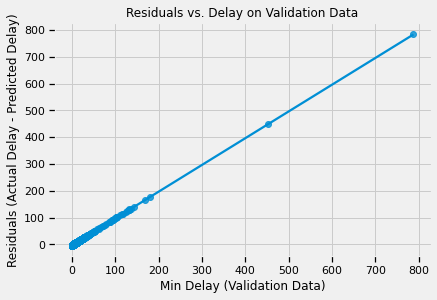

In [295]:
residuals = y_val - y_predicted
ax = sns.regplot(y_val, residuals)
ax.set_xlabel('Min Delay (Validation Data)')
ax.set_ylabel('Residuals (Actual Delay - Predicted Delay)')
ax.set_title("Residuals vs. Delay on Validation Data");

In [293]:
from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_validate_rmse(model, X, y):
    
    # Setup
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    
    # Iterature thought cv-folds
    for train_index, val_index in five_fold.split(X):
        
        # Write your code here.
        # Fit model
        model.fit(X.iloc[train_index],y.iloc[train_index])
        y_predict = model.predict(X.iloc[val_index])
        # Append RMSE scores
        rmse_values.append(rmse(y.iloc[val_index], y_predict))
        
    return rmse_values

In [294]:
cv_scores = cross_validate_rmse(model=LinearRegression(fit_intercept=True), X=X_train, y=y_train)

# Print cv scores
print('Cross-validation RMSE scores: {}'.format(cv_scores))
print('Cross-validation RMSE scores mean: {}'.format(np.mean(cv_scores)))
print('Cross-validation RMSE scores std: {}'.format(np.std(cv_scores)))

Cross-validation RMSE scores: [10.081722970211967, 12.060896439621564, 9.502505961336341, 8.058171763053835, 11.117291971404457]
Cross-validation RMSE scores mean: 10.164117821125632
Cross-validation RMSE scores std: 1.3700976645715566
